In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install bertopic

In [5]:
!pip install pyvis
!pip install bertopic[flair]
!pip install bertopic[gensim]
!pip install bertopic[spacy]
!pip install bertopic[use]
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm
!pip install octis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 43.1 MB/s 
  Using cached importlib_metadata-3.10.1-py3-none-any.whl (14 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.4
    Uninstalling importlib-metadata-4.11.4:
      Successfully uninstalled importlib-metadata-4.11.4
  Attempting uninstall: gensim
    Found existing installation: gensim 4.2.0
    Uninstalling gensim-4.2.0:
      Successfully uninstalled gensim-4.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
octis 1.10.4 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
markdown 3.3.7 requires importlib-metadata>=4.4; python_versi

In [6]:
import pandas as pd
import spacy
import numpy as np
import re
from tqdm.auto import tqdm
from bertopic import BERTopic
import networkx as nx
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from pyvis.network import Network
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.dataset.dataset import Dataset


In [7]:
def removing_na(df, COLUMN):
  # remove the rows with NA
  df = df.loc[(df[COLUMN].isna() == False)]
  return df

In [8]:
def preprocessing(df, COLUMN):
  # pre processing
  nlp = spacy.load("en_core_web_sm")
  texts = df[COLUMN]

  processed_texts = [text for text in tqdm(nlp.pipe(texts, 
                                              disable=["ner",
                                                       "parser"]),
                                          total=len(texts))]
  # lemmatizing, removing stop words and panctuation, lowercasing and taking nouns and adjectives
  lemmatized_texts = [[token.lemma_.lower() for token in doc if 
                    not token.is_punct and not token.is_stop and (token.pos_ == 'NOUN' or token.pos_ == 'ADJ')] for doc in processed_texts]
  # remove numbers
  lemmatized_texts = [[re.sub(r'^[0-9]+|^.$', '', word) for word in text] for text in lemmatized_texts]
  # remove empty values
  lemmatized_texts = [[token for token in text if token != ''] for text in lemmatized_texts]
  return lemmatized_texts

In [9]:
df_prisoners_dilemmas = pd.read_csv('/content/gdrive/MyDrive/thesis_datasets/prisoners_dilemma/prisoners_dilemmas.csv')

In [10]:
df_keywords  = removing_na(df_prisoners_dilemmas, COLUMN = 'keywords')
df_abstracts  = removing_na(df_prisoners_dilemmas, COLUMN = 'abstract')

In [11]:
list_keywords = df_keywords['keywords'].to_list()
list_abstracts = df_prisoners_dilemmas['abstract'].to_list()

In [12]:
lemmatized_keywords = preprocessing(df_keywords, COLUMN = 'keywords')
lemmatized_abstracts = preprocessing(df_abstracts, COLUMN = 'abstract')

  0%|          | 0/1729 [00:00<?, ?it/s]

  0%|          | 0/2004 [00:00<?, ?it/s]

In [13]:
allkeywords = []

for wordlist in lemmatized_keywords:
  string = ''
  string = ' '.join([str(item) for item in wordlist])
  allkeywords.append(string)


In [28]:
allabstracts = []

for wordlist in lemmatized_abstracts:
  string = ''
  string = ' '.join([str(item) for item in wordlist])
  allabstracts.append(string)


# KEYWORDS

In [15]:
model_keywords = BERTopic(embedding_model="paraphrase-MiniLM-L3-v2",min_topic_size = 7)


In [16]:
topics_keywords, probabilities_keywords = model_keywords.fit_transform(allkeywords)

  0%|          | 0.00/63.9M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
freq_keywords= model_keywords.get_topic_info()
print("Number of topics: {}".format( len(freq_keywords)))
freq_keywords

In [18]:
model_keywords.visualize_topics()

In [19]:
model_keywords.visualize_barchart()

## **ABSTRACTS**


In [29]:
model_abstracts = BERTopic(embedding_model="paraphrase-MiniLM-L3-v2", min_topic_size = 7)


In [30]:
topics_abstracts, probabilities = model_abstracts.fit_transform(allabstracts)

In [31]:
freq = model_abstracts.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq

Number of topics: 43


,Topic,Count,Name
0,-1,842,-1_group_social_cooperation_behavior
1,0,171,0_punishment_sanction_institution_costly
2,1,136,1_prisoner_dilemma_strategy_game
3,2,96,2_game_player_cooperation_behavior
4,3,53,3_sex_female_male_woman
5,4,42,4_resource_pool_request_common
6,5,41,5_trust_truster_closeness_patient
7,6,39,6_contribution_good_public_provision
8,7,36,7_intergroup_conflict_group_discontinuity
9,8,36,8_brain_social_interaction_human


In [32]:
model_abstracts.visualize_topics()

In [33]:
model_abstracts.visualize_barchart()

# KEYWORDS COHERENCE AND DIVERSITY


In [34]:
dataset_keywords = Dataset()
dataset_keywords.load_custom_dataset_from_folder("/content/gdrive/MyDrive/thesis_datasets/prisoners_dilemma/keywords")

In [35]:
all_words = [word for words in dataset_keywords.get_corpus() for word in words]
bertopic_topics = [
    [
        vals[0] if vals[0] in all_words else all_words[0]
        for vals in model_keywords.get_topic(i)[:10]
    ]
    for i in range(len(set(topics_keywords)) - 1)
]

output_keywords = {"topics": bertopic_topics}


In [38]:
npmi_keywords = Coherence(texts=dataset_keywords.get_corpus(), topk=10, measure="c_v")
topic_diversity_keywords = TopicDiversity(topk=10)

In [39]:
npmi_keywords.score(output_keywords)

0.40744482518396713

In [40]:
topic_diversity_keywords.score(output_keywords)

0.5184210526315789

# ABSTRACTS COHERENCE AND DIVERSITY


In [41]:
dataset_abstracts = Dataset()
dataset_abstracts.load_custom_dataset_from_folder("/content/gdrive/MyDrive/thesis_datasets/prisoners_dilemma/abstracts")

In [42]:
all_words = [word for words in dataset_abstracts.get_corpus() for word in words]
bertopic_topics = [
    [
        vals[0] if vals[0] in all_words else all_words[0]
        for vals in model_abstracts.get_topic(i)[:10]
    ]
    for i in range(len(set(topics_abstracts)) - 1)
]

output_abstracts = {"topics": bertopic_topics}


In [43]:
npmi_abs = Coherence(texts=dataset_abstracts.get_corpus(), topk=10, measure="c_v")
topic_diversity_abs= TopicDiversity(topk=10)

In [44]:
npmi_abs.score(output_abstracts)

0.37422394360627054

In [45]:
topic_diversity_abs.score(output_abstracts)

0.7476190476190476

# NETWORKS

In [46]:
# create df with nodes and edges
def generate_edges(topic2words):
  word2topics = {}
  for key ,values in topic2words.items():
    for value in values:
      if value in word2topics:
        word2topics[value].append(key)
      else:
        word2topics[value] = [key]

  source = []
  target = []
  for topic, words in topic2words.items():
    for word in words:
      for top in word2topics[word]:
        if top != topic:
          source.append(f"{words[0]}\n{words[1]}")
          target_words = topic2words[top]
          target.append(f"{target_words[0]}\n{target_words[1]}")


  df = pd.DataFrame()
  df['source'] = source
  df['target'] = target
  df['weight'] = 1

  return df

In [47]:
def create_dict_top2word(model):  
  topic2words = {}
  for topic in  model.get_topics():
    if topic not in [0, -1]:
      topic2words[topic] = [word[0] for word in model.get_topics()[topic]]
  return topic2words

In [48]:
def df2network(edges_df):
  network = nx.from_pandas_edgelist(edges_df, source = 'source', target = 'target', edge_attr = 'weight',create_using=nx.MultiGraph())
  return network


## KEYWORDS NETWORK


In [49]:
keywords_edges = generate_edges(create_dict_top2word(model_keywords))
keywords_edges.to_csv("BERT_keywords_prisoners_network.csv")

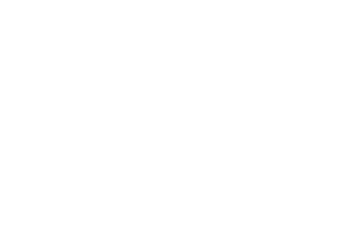

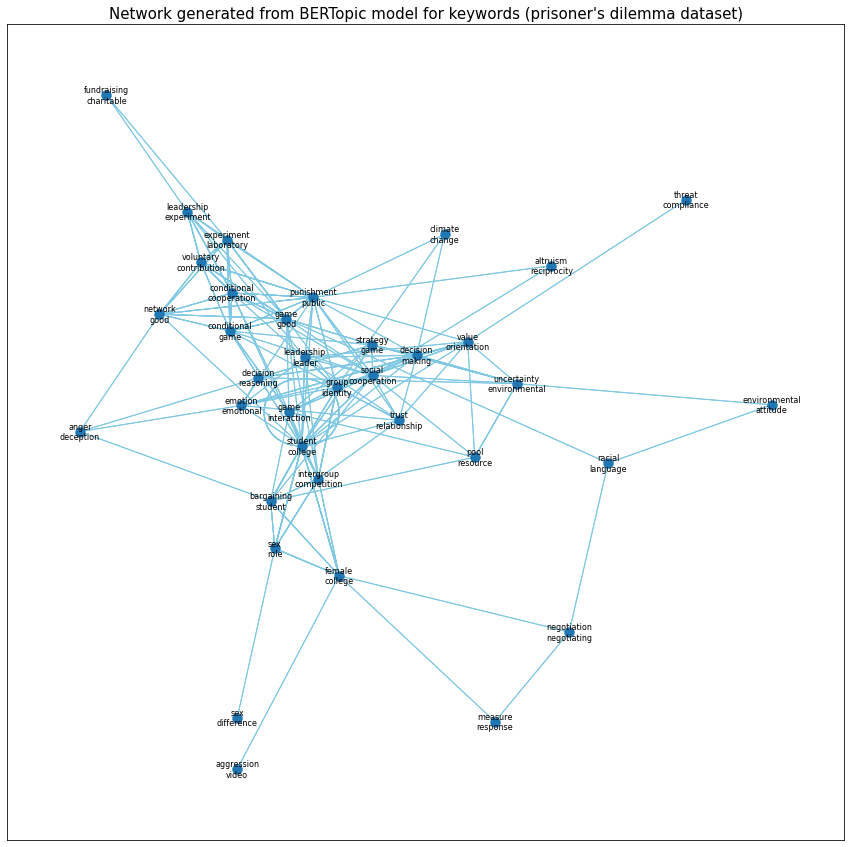

In [66]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from BERTopic model for keywords (prisoner\'s dilemma dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(keywords_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)
                 

In [51]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(keywords_edges))

net.show("BERT_net_keywords_prisoners.html")

## ABSTRACTS NETWORK


In [52]:
abstracts_edges = generate_edges(create_dict_top2word(model_abstracts))
abstracts_edges.to_csv("BERT_abstracts_prisoners_network_df.csv")

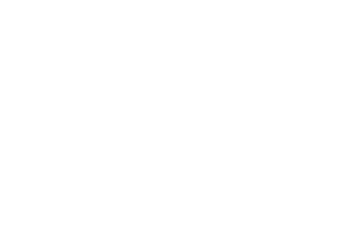

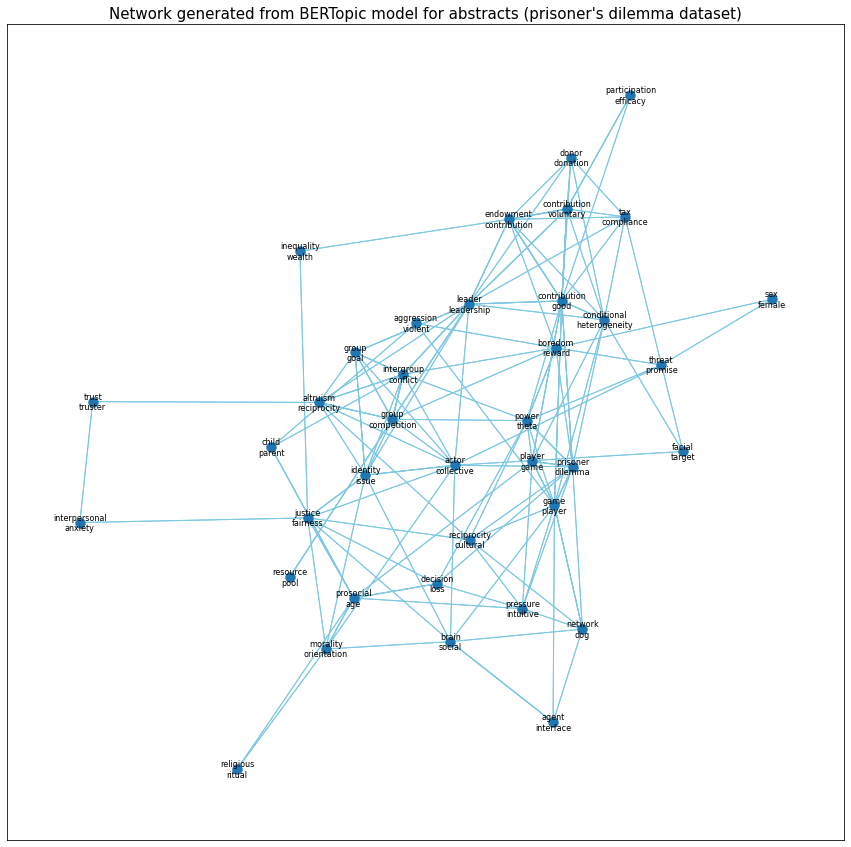

In [67]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from BERTopic model for abstracts (prisoner\'s dilemma dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(abstracts_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)

In [54]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(abstracts_edges))

net.show("BERT_net_abstracts_prisoners_regulation.html")